In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
396376,396376,529438,115850,Why do raccoons eat cat food?,Can dogs eat cat food?,0
246265,246265,122185,359290,Is there a way to email Instagram customer sup...,Why doesn't Netflix offer customer support via...,0
151750,151750,238541,238542,Does US universities wave off application fees...,What is the right time to ask for application ...,0
200433,200433,72354,302194,"What is the ""Silicon Valley"" of Europe?",Is there any silicon Valley in Europe?,1
211371,211371,308315,177891,How can you get pregnant during miscarriage?,How does a woman become pregnant?,0
222969,222969,330672,330673,Is there a polite phrase in Arabic that would ...,I want my wedding to be an adults-only affair....,0
78614,78614,86772,134013,Can Hawaiian baby woodrose seeds be imported i...,Is cloud seeding legal?,0
213058,213058,92402,318282,Dating Advice: Is it ridiculous to fall in lov...,Relationship Advice: How do you know if you're...,0
111466,111466,182562,182563,What is patriotism?,What is patriotism according to you?,0
327377,327377,453798,453799,How can I join BITS Pilani while diploma?,When should I join BITS Pilani?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [6]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [7]:
df.duplicated().sum()

0

<Axes: xlabel='is_duplicate', ylabel='count'>

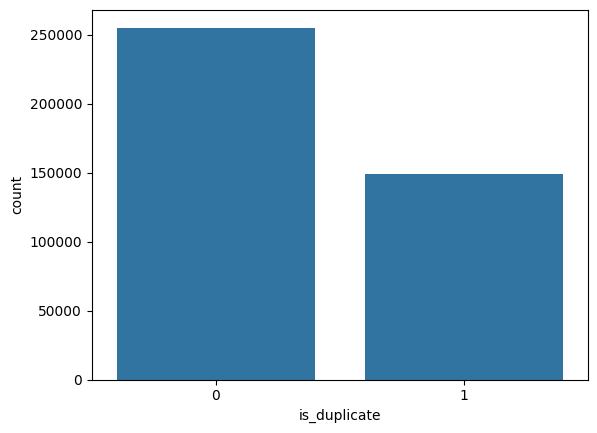

In [8]:
#Countplot of Outcome
sns.countplot(x=df['is_duplicate'], data=df)

In [9]:
#Counting the number of repeated questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])

x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


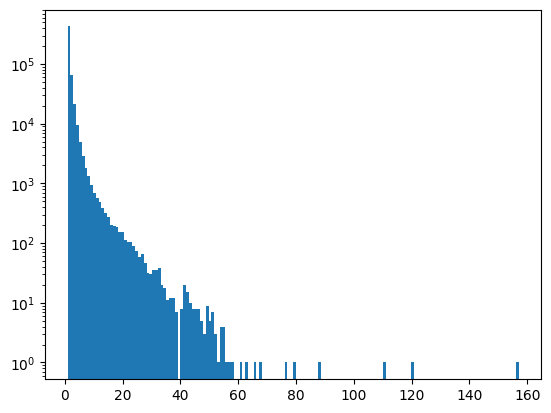

In [10]:
#Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

Simple Approach - Use of Bag of Words to columns 'question1' and 'question2' and then we will apply Random Forest Algorithm

In [11]:
#We will take only first 30000 questions
new_df=df.sample(30000)
ques_df=new_df[['question1','question2']]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
#Merge the texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

In [14]:
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

Now we have 30000 questions with 3000 bag of words for each questions hence we have 6000 columns and 30000 rows

In [ ]:
temp_df['is_duplicate']=new_df['is_duplicate']
temp_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, :-1].values, temp_df.iloc[:, -1].values, test_size=0.2, random_state=42)

#temp_df.iloc[:,0:-1].values: This selects all columns except the last one as the feature set X.
#temp_df.iloc[:,-1].values: This selects the last column as the label set y.

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
confusion_matrix(y_test,y_pred)

NameError: name 'X_train' is not defined

In [ ]:
ac=accuracy_score(y_test,y_pred)
print(ac)

Basic Feature Engineering

I will add the below 7 extra columns

q1len,q2len,q1words,q2words,words_common, words_total,words_share

and then will train it with Random Forest Model

In [16]:
new_df=df.sample(30000)
new_df=new_df.dropna(subset=['question1'])
new_df=new_df.dropna(subset=['question2'])

In [17]:
#Feature Engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
2254,2254,4482,4483,Do guys forget about girls they like easily?,Is it true that Darwin plagiarized his theory ...,0,44,59,8,10
290554,290554,411847,411848,What can you get as a customer of Star Alliance?,What are some ways to register with Star Allia...,0,48,50,10,9
389003,389003,406908,184214,What's the best sex position after foreplay?,What is the best sex position? Why?,0,44,35,7,7
150170,150170,236405,236406,How does someone prevent dozing off at the off...,Do doctors get nostalgic about medical school ...,0,50,94,9,15
140696,140696,93032,223546,How do I start writing a research paper in the...,I am a Civil Engineering student and want to w...,1,71,88,13,17


In [18]:
#set will give the list of unique words

def common_words(row):
  w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return len(w1&w2)

new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
2254,2254,4482,4483,Do guys forget about girls they like easily?,Is it true that Darwin plagiarized his theory ...,0,44,59,8,10,0
290554,290554,411847,411848,What can you get as a customer of Star Alliance?,What are some ways to register with Star Allia...,0,48,50,10,9,3
389003,389003,406908,184214,What's the best sex position after foreplay?,What is the best sex position? Why?,0,44,35,7,7,3
150170,150170,236405,236406,How does someone prevent dozing off at the off...,Do doctors get nostalgic about medical school ...,0,50,94,9,15,1
140696,140696,93032,223546,How do I start writing a research paper in the...,I am a Civil Engineering student and want to w...,1,71,88,13,17,6


In [19]:
def total_words(row):
  w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1)+len(w2))

new_df['word_total']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
2254,2254,4482,4483,Do guys forget about girls they like easily?,Is it true that Darwin plagiarized his theory ...,0,44,59,8,10,0,18
290554,290554,411847,411848,What can you get as a customer of Star Alliance?,What are some ways to register with Star Allia...,0,48,50,10,9,3,19
389003,389003,406908,184214,What's the best sex position after foreplay?,What is the best sex position? Why?,0,44,35,7,7,3,14
150170,150170,236405,236406,How does someone prevent dozing off at the off...,Do doctors get nostalgic about medical school ...,0,50,94,9,15,1,21
140696,140696,93032,223546,How do I start writing a research paper in the...,I am a Civil Engineering student and want to w...,1,71,88,13,17,6,28


In [20]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
2254,2254,4482,4483,Do guys forget about girls they like easily?,Is it true that Darwin plagiarized his theory ...,0,44,59,8,10,0,18,0.00
290554,290554,411847,411848,What can you get as a customer of Star Alliance?,What are some ways to register with Star Allia...,0,48,50,10,9,3,19,0.16
389003,389003,406908,184214,What's the best sex position after foreplay?,What is the best sex position? Why?,0,44,35,7,7,3,14,0.21
150170,150170,236405,236406,How does someone prevent dozing off at the off...,Do doctors get nostalgic about medical school ...,0,50,94,9,15,1,21,0.05
140696,140696,93032,223546,How do I start writing a research paper in the...,I am a Civil Engineering student and want to w...,1,71,88,13,17,6,28,0.21


<ipython-input-21-db225094ac1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q1_len'])


minimum characters 1
minimum characters 340
average characters 59.509033333333335


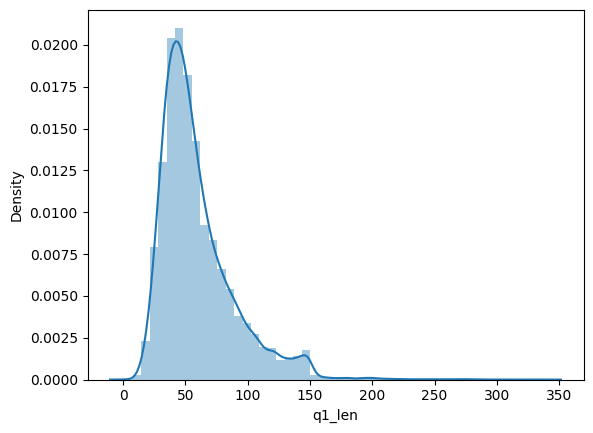

In [21]:
#Feature Analysis
sns.distplot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('minimum characters',new_df['q1_len'].max())
print('average characters',new_df['q1_len'].mean())

<ipython-input-22-ac0e52f71a64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['q2_len'])


minimum characters 3
minimum characters 1151
average characters 60.172066666666666


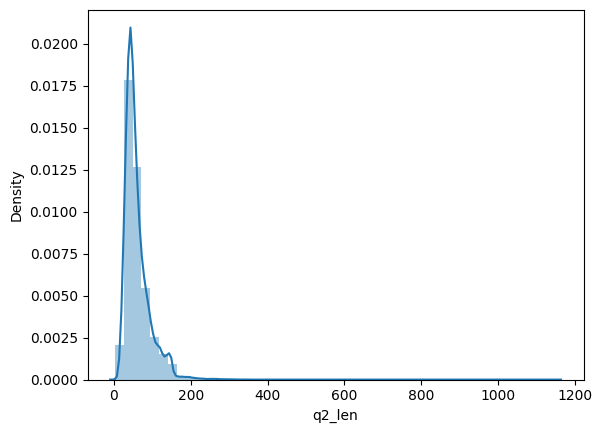

In [22]:
sns.distplot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('minimum characters',new_df['q2_len'].max())
print('average characters',new_df['q2_len'].mean())

<ipython-input-23-86dbdf59e692>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_duplicate')
<ipython-input-23-86dbdf59e692>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplic

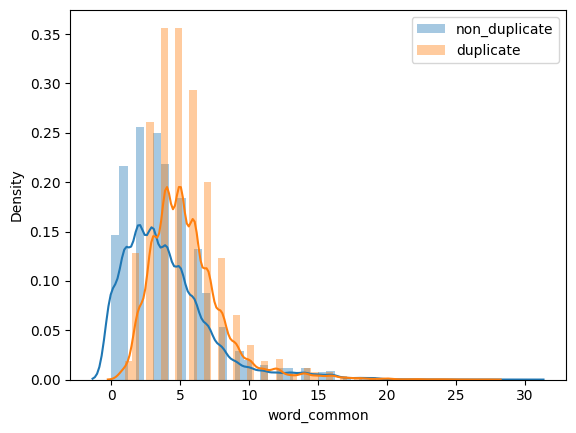

In [23]:
#Common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

From the above graph we can observe that if the words common is less than 4 then the probability of the questions to be non_duplicate is high

<ipython-input-24-4d6a39cb4fff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
<ipython-input-24-4d6a39cb4fff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicat

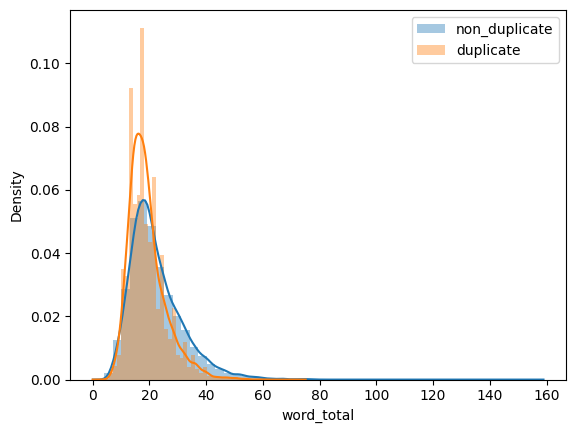

In [24]:
#Total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

If the total number of words is around 20 then the probability of duplicate is high whereas when it is more than 40 the probability of non duplicate is high

<ipython-input-25-089b044803d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non_duplicate')
<ipython-input-25-089b044803d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicat

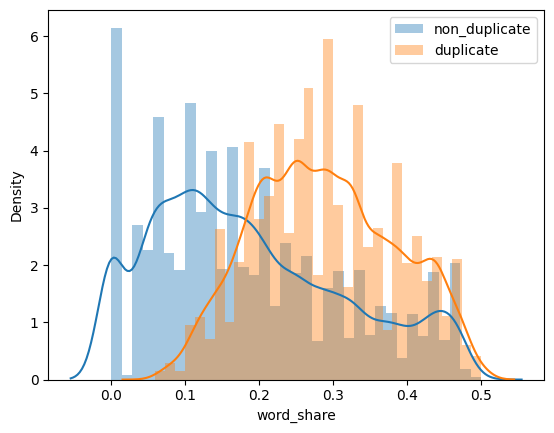

In [25]:
#Shared words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non_duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

If the value of word_share is less than 0.2 then probability of the questions to be non_duplicate is high

In [26]:
ques_df=new_df[['question1','question2']]
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
2254,0,44,59,8,10,0,18,0.00
290554,0,48,50,10,9,3,19,0.16
389003,0,44,35,7,7,3,14,0.21
150170,0,50,94,9,15,1,21,0.05
140696,1,71,88,13,17,6,28,0.21


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texs
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [28]:
temp1_df=pd.DataFrame(q1_arr,index=ques_df.index)
temp2_df=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp1_df,temp2_df],axis=1)
temp_df.shape

(30000, 6000)

In [29]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
2254,0,44,59,8,10,0,18,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
290554,0,48,50,10,9,3,19,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
389003,0,44,35,7,7,3,14,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
150170,0,50,94,9,15,1,21,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
140696,1,71,88,13,17,6,28,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.77

ADVANCED APPROACH

1. TOKEN Features

cwc_min: Ratio of the number of common words to length of smaller
question

cwc_max: Ratio of the number of common words to length of larger question

csc_min: Ratio of the number of common stop words to smaller stop word count among questions

cwc_max: Ratio of the number of common stop words to larger stop word count among questions

ctc_min: Ratio of the number of common tokens to smaller token count among the two questions

ctc_max: Ratio of the number of common tokens to larger token count among the two questions

last_word_eq: 1 if last word of the two questions are same

first_word_eq: 1 if first word of the two questions are same

2. Length Based features

mean_len: Mean of length of two questions

abs_len_diff: Absolute diff btwn length of two questions

longest_substring_ratio: Ratio of length of longest common substring to the length of smaller question

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [34]:
new_df = df.sample(30000,random_state=2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [35]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')

    # Decontracting words
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q

In [36]:
#Apply the preprocess technique for both the questions
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [37]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)

def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


In [40]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    # When performing division operations, if the denominator is zero,
    #it would raise a ZeroDivisionError. By using SAFE_DIV, you can add a small value (0.0001 in this case)
    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    #The code calculates 8 different features related to the tokens.
    #By initializing the token_features list with 8 elements set to 0.0, we ensure that we have a placeholder for each feature.
    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [42]:
#Now we will map the output of the fetch_token_features function to multiple new columns in the new_df DataFrame.
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [43]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,24,0.33,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,38,0.11,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,34,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0


In [45]:
#Now we will create the length features
!pip install distance
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=716b146ac8be7f7fadeaea42088542bc776bf9931d0a9db110f5df21a169af2d
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [46]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


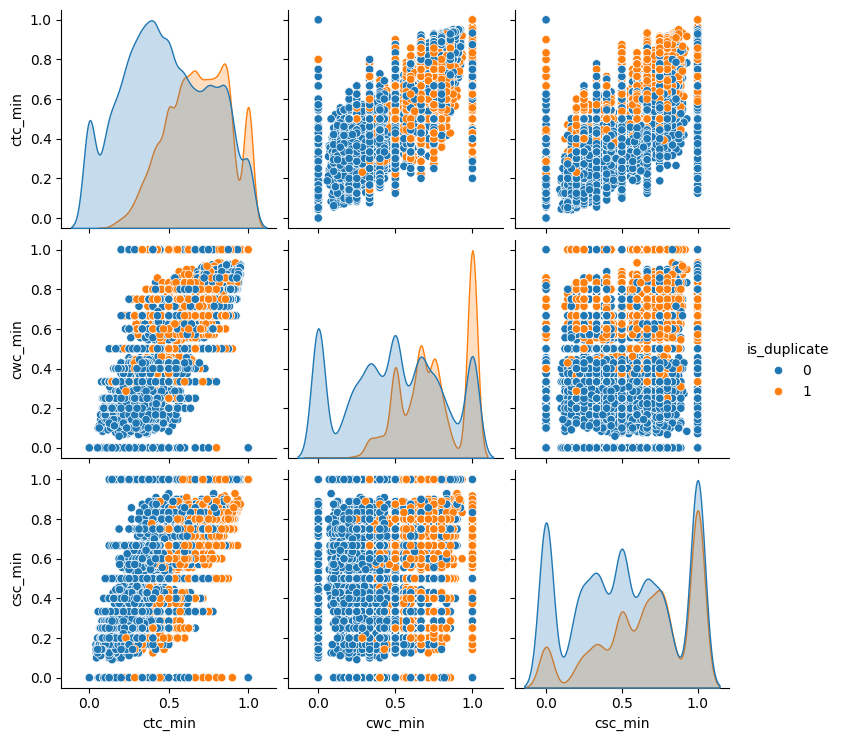

In [47]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

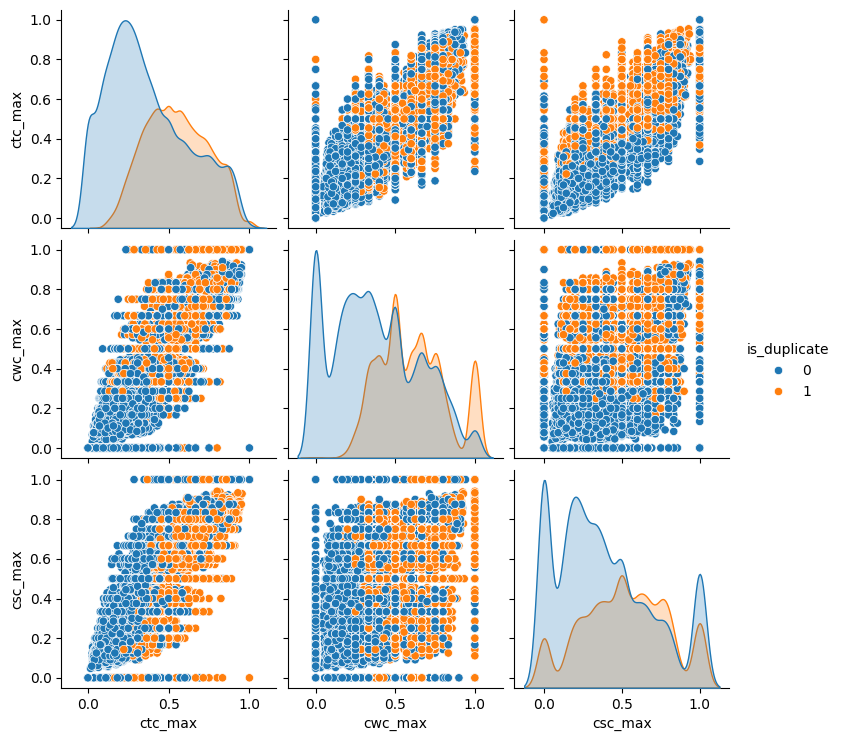

In [48]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

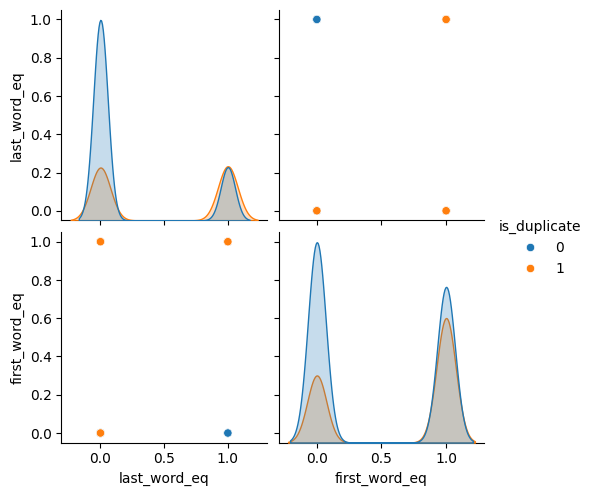

In [49]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

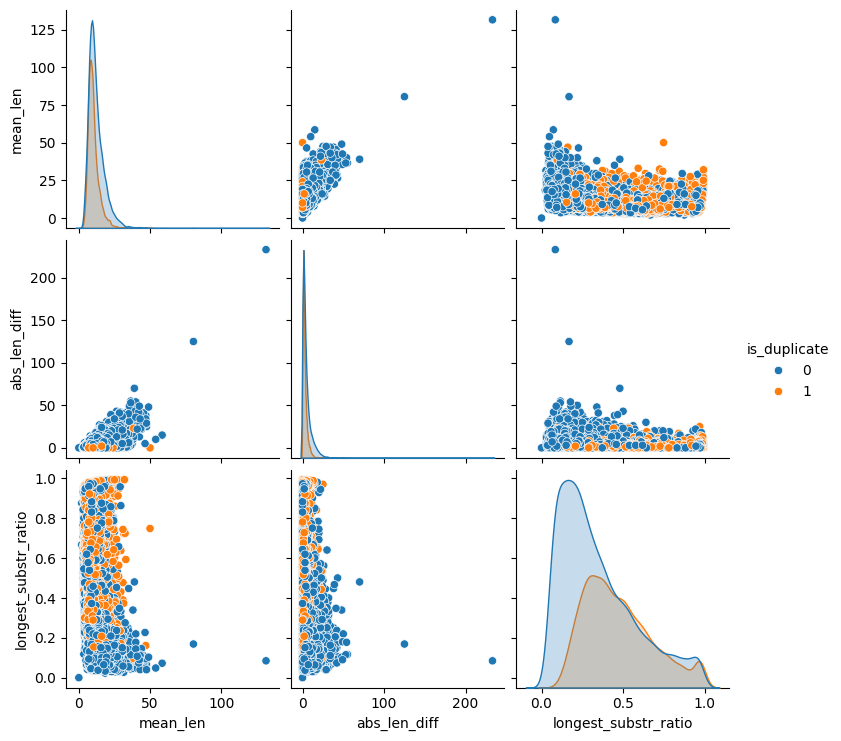

In [50]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [52]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [53]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [54]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 19)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,0,48,56,13,16,8,24,0.33,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,0,104,119,28,21,4,38,0.11,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,0,58,145,14,32,1,34,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.542857


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [56]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [57]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6019)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,75,76,13,13,12,26,0.46,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,48,56,13,16,8,24,0.33,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
327711,0,104,119,28,21,4,38,0.11,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,58,145,14,32,1,34,0.03,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,34,49,5,9,3,13,0.23,0.749981,0.599988,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.78

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3312,  500],
       [ 820, 1368]])

In [61]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))